In [315]:
import torch

## non-linear activation 으로 이진 분류 문제 풀기

1. 데이터 모으기
2. 모델 만들기
3. 모델 학습시키기 (경계가 선형이면 선형 분류)
4. 모델 테스트하기


## STEP1. 데이터 만들기

In [316]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
#print(random0)
#print(random5)
class1_data=torch.hstack([random0,random5]) # 옆에 갖다 붙인다
class2_data=torch.hstack([random5,random0])
print(class1_data)
print(class2_data)
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
print(X)
y=torch.vstack([class1_label,class2_label])



# case 2
N=100
radius1=0.3+0.05*torch.randn(int(N/2),1)
radius2=1+0.01*torch.randn(int(N/2),1)
theta1=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
theta2=2*torch.pi*torch.rand(int(N/2),1)-torch.pi
class1_data=torch.hstack([radius1*torch.cos(theta1), radius1*torch.sin(theta1)])
class2_data=torch.hstack([radius2*torch.cos(theta2), radius2*torch.sin(theta2)])
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
X=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])

tensor([[ 3.5973e-03,  4.7710e+00],
        [ 2.3997e-01,  4.4602e+00],
        [-3.3057e-01,  5.8464e+00],
        [-1.0016e+00,  6.4463e+00],
        [ 6.8110e-01,  4.1272e+00],
        [-9.7011e-01,  4.4585e+00],
        [ 2.6678e-01,  5.3910e+00],
        [ 4.1465e-01,  5.5816e+00],
        [ 1.8570e+00,  7.5540e+00],
        [-2.4407e-01,  4.4861e+00]])
tensor([[ 4.7710e+00,  3.5973e-03],
        [ 4.4602e+00,  2.3997e-01],
        [ 5.8464e+00, -3.3057e-01],
        [ 6.4463e+00, -1.0016e+00],
        [ 4.1272e+00,  6.8110e-01],
        [ 4.4585e+00, -9.7011e-01],
        [ 5.3910e+00,  2.6678e-01],
        [ 5.5816e+00,  4.1465e-01],
        [ 7.5540e+00,  1.8570e+00],
        [ 4.4861e+00, -2.4407e-01]])
tensor([[ 3.5973e-03,  4.7710e+00],
        [ 2.3997e-01,  4.4602e+00],
        [-3.3057e-01,  5.8464e+00],
        [-1.0016e+00,  6.4463e+00],
        [ 6.8110e-01,  4.1272e+00],
        [-9.7011e-01,  4.4585e+00],
        [ 2.6678e-01,  5.3910e+00],
        [ 4.1465e-01,  5.5

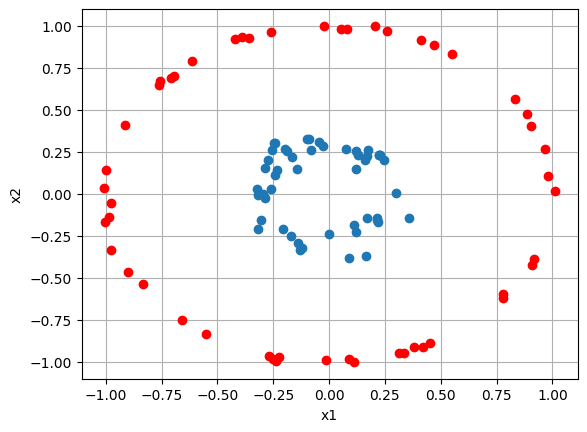

In [317]:
import matplotlib.pyplot as plt
# 파란색이 몸무게 빼야될 사람, 빨간색이 쪄야될 사람
plt.plot(class1_data[:,0],class1_data[:,1],'o')
plt.plot(class2_data[:,0],class2_data[:,1],'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## STEP2. 모델 만들기

In [318]:
from torch import nn

# Multi Layer Perceptron
class MLP(nn.Module):
    def __init__(self) :
        super().__init__()
        #case 1, plain
        #hidden layer 한 층
        # self.linear=nn.Sequential(nn.Linear(2,100),
        #                           nn.Sigmoid(),
        #                           nn.Linear(100,1),
        #                           nn.Sigmoid() # 0에 가까우면 뭐, 1에 가까우면 뭐 이런 식으로 ex) 기준 = 0.5
        #                           )

        #case 1, very simple
        self.linear=nn.Sequential(nn.Linear(2,1),
                                  nn.Sigmoid() # 0에 가까우면 뭐, 1에 가까우면 뭐 이런 식으로 ex) 기준 = 0.5
                                  )

        # #case 1, ㅇㄷ데
        # self.linear=nn.Sequential(nn.Linear(2,100),
        #                           nn.Sigmoid(),
        #                           nn.Linear(100,100),
        #                           nn.Sigmoid(), # 0에 가까우면 뭐, 1에 가까우면 뭐 이런 식으로 ex) 기준 = 0.5
        #                           nn.Linear(100,100),
        #                           nn.Sigmoid(), # 0에 가까우면 뭐, 1에 가까우면 뭐 이런 식으로 ex) 기준 = 0.5
        #                           nn.Linear(100,1),
        #                           nn.Sigmoid() # 0에 가까우면 뭐, 1에 가까우면 뭐 이런 식으로 ex) 기준 = 0.5
        #                           )

    def forward(self,x) :
        x=self.linear(x) # 밑의 것이됨
        return x


In [319]:
model = MLP()
print(model)
# 2채널을 가진 5개
print(model(torch.randn(5,2)).shape) # 5개 입력값에 대한 하나의 출력값

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=1, bias=True)
    (1): Sigmoid()
  )
)
torch.Size([5, 1])


## STEP3. 모델 학습시키기

In [320]:
from torch import optim # optimizer 들이 여기 다 들어가있다
import torch.nn.functional as F

#w(k+1)=w(k)-ag(k)
#learning rate 랑 epoch 는 사전에 정해줘야한다
LR = 1e-1 # case 1 1/10
EPOCH = 100 # case 1
# optimizer = optim.SGD(model.parameters(), lr=LR) # weight 랑 learning rate를 넘겨준다
optimizer = optim.Adam(model.parameters(), lr=LR) # case 1, deep

loss_history=[]

model.train() # train mode 로 전환
for ep in range(EPOCH) :
    # inference
    y_hat=model(X)
    # loss: machine 의 출력과 label을 주면됨
    loss = F.binary_cross_entropy(y_hat,y) # 파라미터 순서 중요
    # update
    optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
    loss.backward() # backpropagation
    optimizer.step() # weight update
    # print loss
    loss_history+=[loss.item()]
    print(f"Epoch: {ep+1}, train loss: {round(loss.item(),3)}")
    print("-"*20)

Epoch: 1, train loss: 0.743
--------------------
Epoch: 2, train loss: 0.726
--------------------
Epoch: 3, train loss: 0.713
--------------------
Epoch: 4, train loss: 0.703
--------------------
Epoch: 5, train loss: 0.697
--------------------
Epoch: 6, train loss: 0.694
--------------------
Epoch: 7, train loss: 0.693
--------------------
Epoch: 8, train loss: 0.694
--------------------
Epoch: 9, train loss: 0.696
--------------------
Epoch: 10, train loss: 0.698
--------------------
Epoch: 11, train loss: 0.699
--------------------
Epoch: 12, train loss: 0.7
--------------------
Epoch: 13, train loss: 0.7
--------------------
Epoch: 14, train loss: 0.699
--------------------
Epoch: 15, train loss: 0.698
--------------------
Epoch: 16, train loss: 0.696
--------------------
Epoch: 17, train loss: 0.695
--------------------
Epoch: 18, train loss: 0.694
--------------------
Epoch: 19, train loss: 0.693
--------------------
Epoch: 20, train loss: 0.692
--------------------
Epoch: 21, tr

In [321]:
x=torch.tensor([1.], requires_grad=True)
for _ in range(2) :
    loss=x**2
    loss.backward()
    print(x.grad) # 2번째 턴에 2가 나와야할텐데 4가 나온다. 누적이 되기 때문이다
    x.grad=None # 그래서 초기화를 해줘야한다

tensor([2.])
tensor([2.])


In [322]:
print(F.binary_cross_entropy(y_hat,y))
print(-torch.sum(torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)

tensor(0.6923, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.6923, grad_fn=<DivBackward0>)


Text(0, 0.5, 'loss')

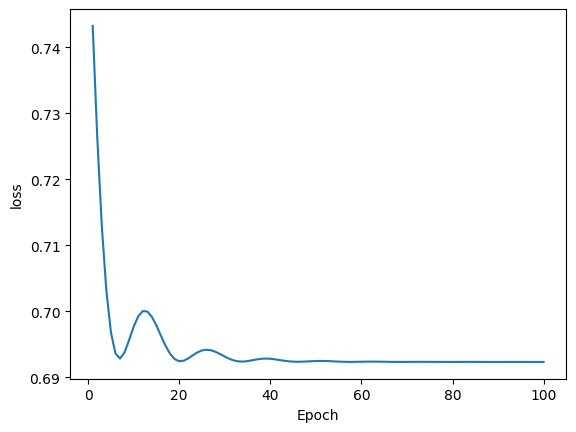

In [323]:
plt.plot(range(1,EPOCH+1),loss_history)
plt.xlabel('Epoch')
plt.ylabel('loss')

##STEP4. 모델 테스트하기

In [324]:
x1_test = torch.linspace(-10,10,30) # case 1
x2_test = torch.linspace(-10,10,30) # case 1
x1_test = torch.linspace(-2,2,30) # case 1
x2_test = torch.linspace(-2,2,30) # case 1


X1_test, X2_test = torch.meshgrid(x1_test,x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2),X2_test.unsqueeze(dim=2)],dim=2)
X_test.shape

model.eval() # test mode 로 변경
with torch.no_grad():
    Y_hat = model(X_test) # 이미 학습된 모델
# 1. dropout 혹은 BN 같은 것 사용했다면 train mode 와 test mode 동작이 다르므로 eval()로 mode를 바꿔줘야
# 2. grad_fn 계산 <- 메모리가 불필요하게 쓰인다
Y_hat = Y_hat.squeeze()

print(y_hat)


tensor([[0.4991],
        [0.4938],
        [0.4991],
        [0.5072],
        [0.5112],
        [0.4905],
        [0.4869],
        [0.4957],
        [0.4867],
        [0.4981],
        [0.5119],
        [0.5102],
        [0.5042],
        [0.5055],
        [0.5117],
        [0.4937],
        [0.5041],
        [0.4948],
        [0.5119],
        [0.5072],
        [0.5091],
        [0.5100],
        [0.5092],
        [0.4887],
        [0.5017],
        [0.5051],
        [0.4998],
        [0.5090],
        [0.4985],
        [0.5023],
        [0.5097],
        [0.5056],
        [0.5119],
        [0.5105],
        [0.4982],
        [0.5095],
        [0.4962],
        [0.5004],
        [0.4890],
        [0.4883],
        [0.5017],
        [0.4862],
        [0.4875],
        [0.4918],
        [0.5056],
        [0.4945],
        [0.4945],
        [0.5052],
        [0.5108],
        [0.4890],
        [0.4739],
        [0.5244],
        [0.5342],
        [0.5024],
        [0.4942],
        [0

Text(0.5, 0.5, 'x2')

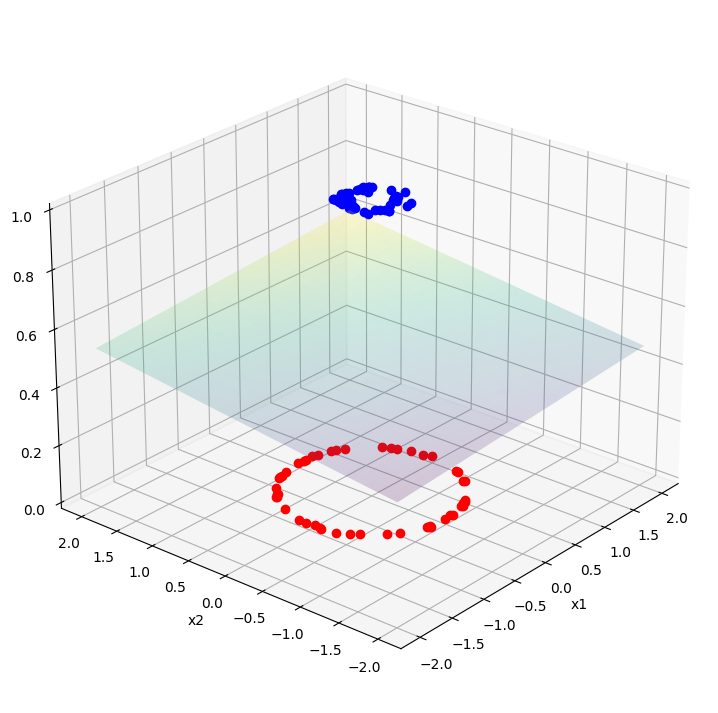

In [325]:
plt.figure(figsize=[10, 9]) # figsize=[가로, 세로]
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=-140) # 보는 각도
ax.plot_surface(X1_test,X2_test, Y_hat.numpy(), cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")

In [326]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X1_test, y=X2_test, z=Y_hat, colorscale="viridis", opacity=0.5)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True, highlightcolor="limegreen", project_z=True))
fig.update_layout(title='binary classification', width=700, height=600)